In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import osmnx as ox

In [6]:
import plotly.express as px

In [7]:
gdf=gpd.read_file('Colleges_and_Universities.zip')

In [8]:
gdf.shape

(217, 30)

In [9]:
gdf.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,geometry
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,3801 W. Temple Ave.,None,...,http://egis3.lacounty.gov/lms/?p=3072,publish,34.049531,-117.814466,2013-06-01,None,None,6.617873e+06,1.840458e+06,POINT (-117.81447 34.04953)
1,2895,211,None,Education,Colleges and Universities,None,www.calstate.edu/executive/,"California State University, The - Office Of T...",401 Golden Shore,None,...,http://egis3.lacounty.gov/lms/?p=3084,publish,33.764616,-118.201257,2013-06-01,None,None,6.500498e+06,1.736780e+06,POINT (-118.20126 33.76462)
2,2973,211,None,Education,Colleges and Universities,None,www.calstatela.edu,California State University Los Angeles,5151 State University Dr.,None,...,http://egis3.lacounty.gov/lms/?p=3145,publish,34.062769,-118.170923,2013-06-01,None,None,6.509902e+06,1.845267e+06,POINT (-118.17092 34.06277)
3,3097,211,None,Education,Colleges and Universities,None,www.laccd.edu,Los Angeles Community College District,770 Wilshire Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=3246,publish,34.049138,-118.258111,2013-06-01,None,None,6.483483e+06,1.840363e+06,POINT (-118.25811 34.04914)
4,11961,HSIP Freedom CollegesUniversities,203049,Education,Colleges and Universities,None,LA County,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,None,...,http://egis3.lacounty.gov/lms/?p=12778,publish,34.025458,-118.282567,2010-11-01,None,None,6.476050e+06,1.831765e+06,POINT (-118.28257 34.02546)


In [10]:
gdf.tail()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,geometry
212,62177,211,None,Education,Colleges and Universities,None,None,Los Angeles Trade Technical College,400 W. Washington Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=68997,publish,34.033227,-118.270041,2013-05-28,None,None,6.479853e+06,1.834582e+06,POINT (-118.27004 34.03323)
213,62310,211,None,Education,Colleges and Universities,None,None,"Help Group, The",13130 Burbank Blvd,None,...,http://egis3.lacounty.gov/lms/?p=70042,publish,34.171910,-118.419360,2015-03-11,None,None,6.434823e+06,1.885206e+06,POINT (-118.41936 34.17191)
214,62928,211,None,Education,Colleges and Universities,None,None,West Los Angeles College,9000 Overland Ave,None,...,http://egis3.lacounty.gov/lms/?p=70461,publish,34.003062,-118.386221,2010-11-01,None,None,6.444611e+06,1.823720e+06,POINT (-118.38622 34.00306)
215,63227,211,None,Education,Colleges and Universities,None,None,Long Beach Community College District,4901 E Carson St,None,...,http://egis3.lacounty.gov/lms/?p=70577,publish,33.834305,-118.135638,2010-11-01,None,None,6.520477e+06,1.762108e+06,POINT (-118.13564 33.83430)
216,63706,211,None,Education,Colleges and Universities,None,None,West Los Angeles College - Community Services ...,9000 Overland Ave,None,...,http://egis3.lacounty.gov/lms/?p=70797,publish,34.003062,-118.386221,2010-11-01,None,None,6.444611e+06,1.823720e+06,POINT (-118.38622 34.00306)


In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    217 non-null    int64   
 1   source      217 non-null    object  
 2   ext_id      189 non-null    object  
 3   cat1        217 non-null    object  
 4   cat2        217 non-null    object  
 5   cat3        0 non-null      object  
 6   org_name    212 non-null    object  
 7   Name        217 non-null    object  
 8   addrln1     215 non-null    object  
 9   addrln2     0 non-null      object  
 10  city        215 non-null    object  
 11  state       217 non-null    object  
 12  hours       15 non-null     object  
 13  phones      215 non-null    object  
 14  url         188 non-null    object  
 15  info1       0 non-null      object  
 16  info2       189 non-null    object  
 17  post_id     217 non-null    int64   
 18  descriptio  28 non-null     object  
 19  

In [12]:
list(gdf)

['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1',
 'addrln2',
 'city',
 'state',
 'hours',
 'phones',
 'url',
 'info1',
 'info2',
 'post_id',
 'descriptio',
 'zip',
 'link',
 'use_type',
 'latitude',
 'longitude',
 'date_updat',
 'email',
 'dis_status',
 'POINT_X',
 'POINT_Y',
 'geometry']

In [19]:
columns_to_keep= ['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'city',
 'state',
 'info1',
 'info2',
 'post_id',
 'zip',
 'latitude',
 'longitude',
 'dis_status',
 'geometry']

In [20]:
gdf= gdf[columns_to_keep]

In [21]:
gdf.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,city,state,info1,info2,post_id,zip,latitude,longitude,dis_status,geometry
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,None,None,3072,91768,34.049531,-117.814466,None,POINT (-117.81447 34.04953)
1,2895,211,None,Education,Colleges and Universities,None,www.calstate.edu/executive/,"California State University, The - Office Of T...",Long Beach,CA,None,None,3084,90802,33.764616,-118.201257,None,POINT (-118.20126 33.76462)
2,2973,211,None,Education,Colleges and Universities,None,www.calstatela.edu,California State University Los Angeles,Los Angeles,CA,None,None,3145,90032,34.062769,-118.170923,None,POINT (-118.17092 34.06277)
3,3097,211,None,Education,Colleges and Universities,None,www.laccd.edu,Los Angeles Community College District,Los Angeles,CA,None,None,3246,90017,34.049138,-118.258111,None,POINT (-118.25811 34.04914)
4,11961,HSIP Freedom CollegesUniversities,203049,Education,Colleges and Universities,None,LA County,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,CA,None,99,12778,90007,34.025458,-118.282567,None,POINT (-118.28257 34.02546)


In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    217 non-null    int64   
 1   source      217 non-null    object  
 2   ext_id      189 non-null    object  
 3   cat1        217 non-null    object  
 4   cat2        217 non-null    object  
 5   cat3        0 non-null      object  
 6   org_name    212 non-null    object  
 7   Name        217 non-null    object  
 8   city        215 non-null    object  
 9   state       217 non-null    object  
 10  info1       0 non-null      object  
 11  info2       189 non-null    object  
 12  post_id     217 non-null    int64   
 13  zip         215 non-null    object  
 14  latitude    217 non-null    float64 
 15  longitude   217 non-null    float64 
 16  dis_status  0 non-null      object  
 17  geometry    217 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), obje

In [23]:
gdf['zip'].value_counts()

91711    8
90010    8
90015    6
90028    5
90230    5
        ..
91748    1
91403    1
91745    1
90095    1
90247    1
Name: zip, Length: 126, dtype: int64

In [ ]:
#91711 is Clairmont, CA. 90010 is between Koreatown and Sanford (along Wilshire Blvd)

In [24]:
school_count= gdf['Name'].value_counts()

In [25]:
school_count=school_count.reset_index()
school_count

,index,Name
0,Marinello School Of Beauty,8
1,Universal College Of Beauty Inc,3
2,Marinello Schools Of Beauty,3
3,Intercoast Colleges,3
4,West Los Angeles College,2
...,...,...
196,Healthy Hair Academy,1
197,Career College Consultants,1
198,Abram Friedman Occupational Center,1
199,American Film Institute Conservatory,1


In [26]:
school_count.columns.to_list()

['index', 'Name']

In [27]:
school_count.columns=['Name','count']

In [28]:
school_count

,Name,count
0,Marinello School Of Beauty,8
1,Universal College Of Beauty Inc,3
2,Marinello Schools Of Beauty,3
3,Intercoast Colleges,3
4,West Los Angeles College,2
...,...,...
196,Healthy Hair Academy,1
197,Career College Consultants,1
198,Abram Friedman Occupational Center,1
199,American Film Institute Conservatory,1


<AxesSubplot:>

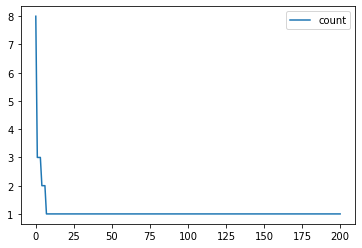

In [29]:
school_count.plot()

In [30]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    217 non-null    int64   
 1   source      217 non-null    object  
 2   ext_id      189 non-null    object  
 3   cat1        217 non-null    object  
 4   cat2        217 non-null    object  
 5   cat3        0 non-null      object  
 6   org_name    212 non-null    object  
 7   Name        217 non-null    object  
 8   city        215 non-null    object  
 9   state       217 non-null    object  
 10  info1       0 non-null      object  
 11  info2       189 non-null    object  
 12  post_id     217 non-null    int64   
 13  zip         215 non-null    object  
 14  latitude    217 non-null    float64 
 15  longitude   217 non-null    float64 
 16  dis_status  0 non-null      object  
 17  geometry    217 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), obje

In [31]:
gdf[['OBJECTID','Name','city','zip','latitude','longitude','geometry']]

,OBJECTID,Name,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


In [32]:
desired_columns=['OBJECTID','Name','city','zip','latitude','longitude','geometry']

gdf[desired_columns]

,OBJECTID,Name,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


In [33]:
gdf_trimmed=gdf[desired_columns].copy()
gdf_trimmed

,OBJECTID,Name,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


<AxesSubplot:>

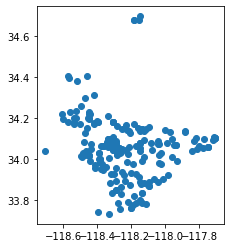

In [34]:
gdf_trimmed.plot()

In [35]:
gdf_trimmed.geometry

0      POINT (-117.81447 34.04953)
1      POINT (-118.20126 33.76462)
2      POINT (-118.17092 34.06277)
3      POINT (-118.25811 34.04914)
4      POINT (-118.28257 34.02546)
                  ...             
212    POINT (-118.27004 34.03323)
213    POINT (-118.41936 34.17191)
214    POINT (-118.38622 34.00306)
215    POINT (-118.13564 33.83430)
216    POINT (-118.38622 34.00306)
Name: geometry, Length: 217, dtype: geometry

<AxesSubplot:>

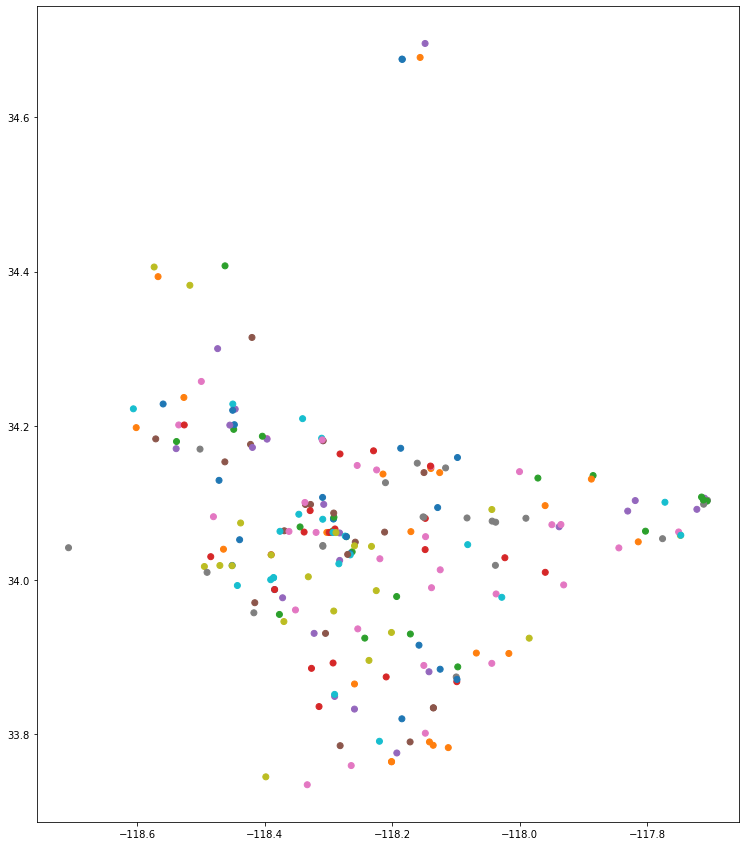

In [38]:
gdf_trimmed.plot(
            figsize=(20,15),  
            column = 'Name',   
            legend = False,              
) 

In [39]:
import folium

In [40]:
m = folium.Map()
m

In [42]:
latitude = gdf_trimmed.latitude.mean()
latitude

34.0581546576037

In [43]:
longitude = gdf_trimmed.longitude.mean()
longitude

-118.22870440806453

In [50]:
m = folium.Map(location= [34.0581546576037, -118.22870440806453])
m

In [54]:
for index, row in gdf_trimmed.iterrows():
    print(row.Name,row.latitude,row.longitude)

California State Polytechnic University - Pomona 34.049531 -117.814466
California State University, The - Office Of The Chancellor 33.764616 -118.201257
California State University Los Angeles 34.062769 -118.170923
Los Angeles Community College District 34.049138 -118.258111
Hebrew Union College-Jewish Institute Of Religion 34.025458 -118.282567
Itt Technical Institute-Sylmar 34.30001 -118.473909
Antioch University-Los Angeles Branch 33.98764 -118.384651
Platt College-Los Angeles 34.081813 -118.151838
Los Angeles Ort Technical Institute 34.063876 -118.369383
Everest College-West Los Angeles 34.032826 -118.389963
Thuy Princess Beauty College 34.057865 -117.748468
North-West College-Glendale 34.148546 -118.255112
Everest College-City Of Industry 34.02892 -118.02357
Fremont College 33.868223 -118.098966
Universal College Of Beauty Inc 34.004239 -118.331741
Itt Technical Institute-Torrance 33.849085 -118.290463
Los Angeles Ort Technical Institute-Sherman Oaks 34.15321 -118.462578
Hacienda 

In [55]:
for index, row in gdf_trimmed.iterrows():
    folium.Marker([row.latitude, row.longitude], popup=row.Name, tooltip=row.Name).add_to(m)
m